# Ön Bilgi
**Geliştiren :** Onur Kantar

**Veri Kümesi :** Iris Data Set - (https://archive.ics.uci.edu/ml/datasets/iris)

**Veri Kümesinin İçeriği :** Her biri 50 türden oluşan 3 sınıf içerir, burada her sınıf bir tür iris bitkisini belirtir. Ayrıca her bir örnek için 4 özellik tanımlanmıştır.

**Veri Kümesinin Sınıfları :** 

-	Iris Setosa (50)
-	Iris Versicolor (50)
-	Iris Virginica (50)

**Algoritma :** Multilayer Perceptron (MLP)

**Ağ Mimarisi :** 

- Dense(8)
- Dense(3)

**batch_size :** 2

**epochs :** 40

**Doğruluk Oranı :** %100


---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from mlxtend.plotting import plot_confusion_matrix
from IPython.display import Image

plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
iris = pd.read_csv("/content/drive/My Drive/Colab Notebooks/K-NN-and-MLP-on-IRIS-Data-Set/iris.csv")

# Veri Setimizi Tanıyalım : 

---


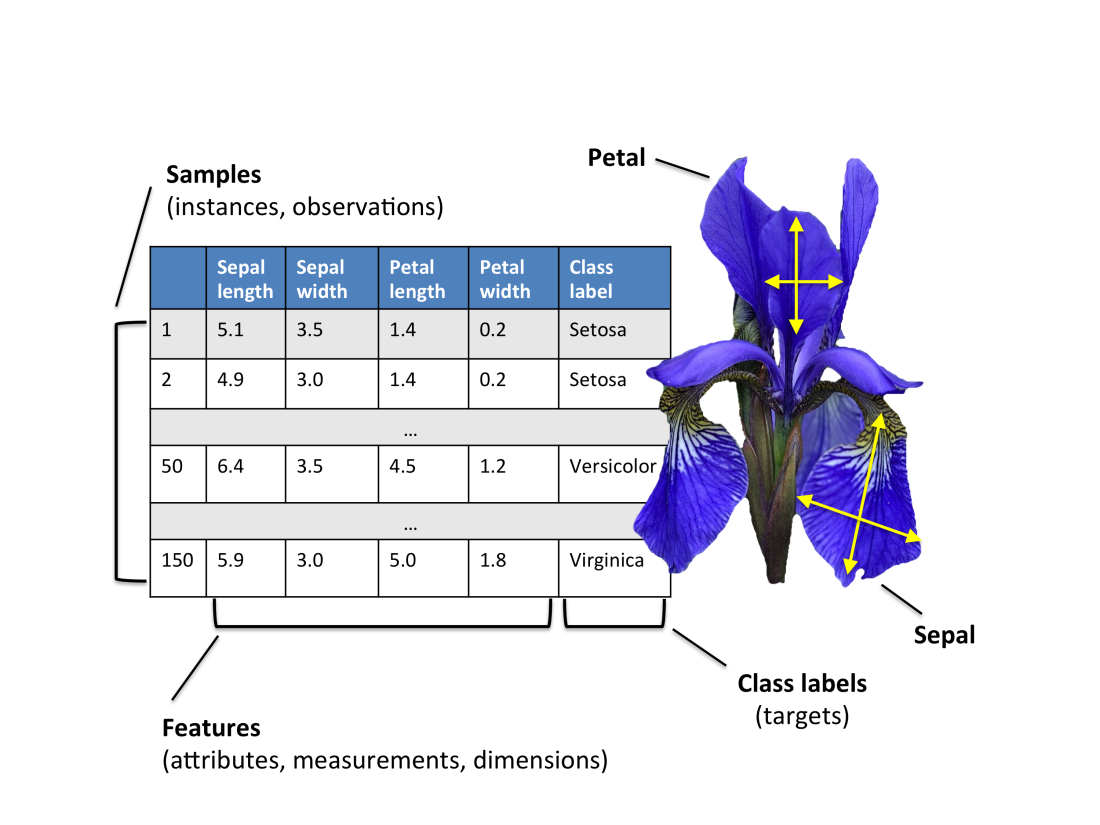

In [3]:
Image(filename="/content/drive/My Drive/Colab Notebooks/K-NN-and-MLP-on-IRIS-Data-Set/img/iris.png", width=700)

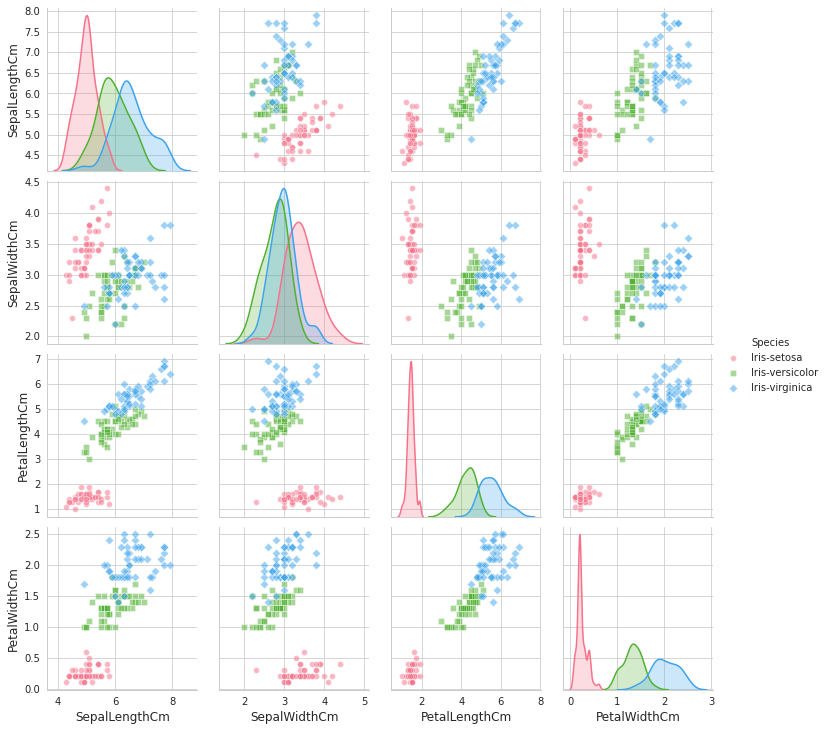

In [4]:
sns.set_style("whitegrid")
sns.pairplot(iris, hue="Species", palette="husl", markers=["o", "s", "D"], plot_kws={'alpha':0.5});

In [5]:
x = iris.iloc[:, :-1]
y = iris.iloc[:, -1:].values.ravel()
last_x = x

# X Verilerimizi Ölçeklendirelim : 

---


## Verileri Ölçeklendirme Nedir : 
Ölçeklendirme dediğimiz şey veri setindeki iki farklı özelliğin (değişkenin) değerlerini en doğru şekilde analiz edebilmemize olanak sağlayan bir yöntemdir.

- Verilerinizin dağılımının ortalama değeri 0 ve standart sapma değeri 1 olacak şekilde değiştiriyoruz (Standartlaştırma).
- Tutarlılık oluşuyor. Bir veri diğer verilerden daha büyükse diğerleri üzerinde egemenlik kurabilir. Bunu istemeyiz.
- Bir öğrenme modeliyle çalışırken, özellikleri sıfır merkezli bir aralığa ölçeklemek önemlidir.

### Örnek :
İki farklı insan düşünelim. Bu insanların birisinin geliri ayda 5.000 Türk Lirası iken diğerinin geliri ayda 200.000 Türk Lirası olsun. Bu insanların ikisi de her ay belirli miktarda maddi yardım için maaşlarının bir kısmını ayırıyorlar. Diyelim ki 5.000 Türk Lirası maaşı olan şahıs 1.500 Türk Lirasını yardıma ayırıyorken, 200.000 Türk Lirası alan şahıs 10.000 Türk Lirasını yardım için ayırıyor.

Normal bir gözle bakarsak 10.000 Türk Lirası yardımda bulunan kişinin daha fazla yardım yaptığını görürüz. Fakat bunu oranladığımızda 5.000 Türk Lirası alan kişinin oransal olarak kat kat fazla yardım yaptığı anlaşılacaktır. İşte özellik ölçeklendirme ile biz bu özelliklerin sayısal değerlerinin birbirine yakın olmasını sağlayıp aralarındaki değerleri karşılaştırmak yerine oranları karşılaştırır.

In [6]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
scaler = StandardScaler()
data_scaler = scaler.fit_transform(x.values)
x = pd.DataFrame(data_scaler, index = x.index, columns = x.columns)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


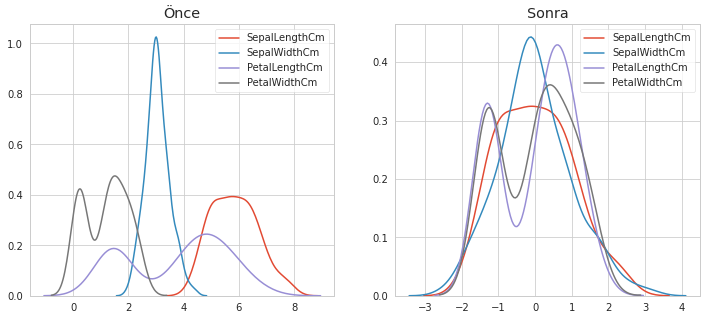

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Önce')
sns.kdeplot(last_x['SepalLengthCm'], ax=ax1)
sns.kdeplot(last_x['SepalWidthCm'], ax=ax1)
sns.kdeplot(last_x['PetalLengthCm'], ax=ax1)
sns.kdeplot(last_x['PetalWidthCm'], ax=ax1)

ax2.set_title('Sonra')
sns.kdeplot(x['SepalLengthCm'], ax=ax2)
sns.kdeplot(x['SepalWidthCm'], ax=ax2)
sns.kdeplot(x['PetalLengthCm'], ax=ax2)
sns.kdeplot(x['PetalWidthCm'], ax=ax2)

plt.show()

# Y Verilerimizi One Hot Encoding Uygulamamız Gerekiyor :  

---


## One Hot Encoding Nedir : 
One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem, ağın model için problemi daha kolay hale getirmesine yardımcı olabilir. Uygulanmaması durumunda düşük performansa veya beklenmeyen sonuçlara neden olabilir.


- Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir.
- Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışındaki tüm değerleri   sıfır  olan bir ikili vektör olarak temsil edilir.


In [9]:
pd.DataFrame(y).sample(5)

,0
16,Iris-setosa
107,Iris-virginica
67,Iris-versicolor
76,Iris-versicolor
119,Iris-virginica


In [10]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
pd.DataFrame(y).sample(5)

,0
87,1
96,1
145,2
144,2
55,1


In [11]:
y = to_categorical(y)
pd.DataFrame(y).sample(5)

,0,1,2
130,0.0,0.0,1.0
110,0.0,0.0,1.0
47,1.0,0.0,0.0
42,1.0,0.0,0.0
116,0.0,0.0,1.0


# Train ve Test İşlemleri İçin Ayrımı Gerçekleştirelim :


---


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y, test_size = 0.2, random_state = 42)

In [13]:
print('x Train : ' + str(x_train.shape))
print('x Test : ' + str(x_test.shape))
print('y Train : ' + str(y_train.shape))
print('y Test : ' + str(y_test.shape))

x Train : (120, 4)
x Test : (30, 4)
y Train : (120, 3)
y Test : (30, 3)


# Katmanları Oluşturup Eğitime Başlayalım : 

---


**Dense Katmanı :** Girdideki her bir düğüm çıkıştaki her bir düğüm ile bağlıdır.

**ReLU :** Doğrusal olmayan bir fonksiyondur. ReLU fonksiyonu negatif girdiler için 0 değerini alırken, x pozitif girdiler için x değerini almaktadır.

**Softmax :** İkiden fazla sınıflamak gereken durumlarda çıkış katmanında tercih edilmektedir. Girdinin belirli sınıfa ait olma olasılığını 0–1 aralığında değerler üreterek belirlenmesini sağlamaktadır. 

**adam :** Doğrusal olmayan problemlerin çözümünde optimum değeri bulmak için optimizasyon yöntemleri kullanılmaktadır.

**categorical_crossentropy :** Softmax ile kullanılan ve birden fazla sınıf için genelleştirilmiş lojistik regresyon.

**Loss :** Loss fonksiyonu temelde modelin yaptığı tahminin, gerçek değerden ne kadar farklı olduğunu hesaplamaktadır.

**accuracy :** Doğruluk oranı.

**epoch :** Her bir eğitim adımında tekrarlanarak model için en uygun ağırlık değerleri hesaplanmaya çalışılır. Bu eğitim adımlarının her birine “epoch” denilmektedir.

**batch_size :** Her seferinde ağa iletilecek örnek sayısı.

**validation_data :** Her adımdan sonra kendini test verileriyle denemeye yarar.

In [14]:
model = Sequential()

model.add(Dense(8, activation='relu', input_dim=4))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 40, batch_size = 2, validation_data=(x_test, y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/40
120/120 [==============================] - 0s 1ms/step - loss: 1.0742 - accuracy: 0.4417 - val_loss: 0.9283 - val_accuracy: 0.7667
Epoch 2/40
120/120 [==============================] - 0s 657us/step - loss: 0.9110 - accuracy: 0.6833 - val_loss: 0.8011 - val_accuracy: 0.8667
Epoch 3/40
120/120 [==============================] - 0s 604us/step - loss: 0.7943 - accuracy: 0.8417 - val_loss: 0.7001 - val_accuracy: 0.9000
Epoch 4/40
120/120 [==============================] - 0s 570us/step - loss: 0.7038 - accuracy: 0.8417 - val_loss: 0.6162 - val_accuracy: 0.9000
Epoch 5/40
120/120 [==============================] - 0s 572us/step - loss: 0.6277 - accuracy: 0.8417 - val_loss: 0.5453 - val_accuracy: 0.9000
Epoch 6/40
120/120 [==============================] - 0s 514us/step - loss: 0.5638 - accuracy: 0.8500 - val_loss: 0.4857 - val_accuracy: 0.9000
Epoch 7/40
120/120 [==============================] - 0s 646us/step - loss: 0.5094 - accuracy

In [15]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.10187559574842453
Test accuracy: 1.0


# Sonuçları Değerlendirelim : 

---


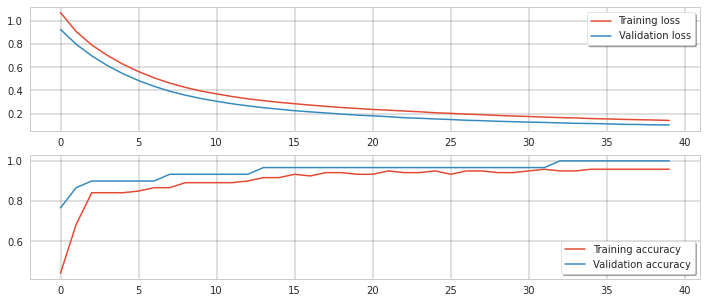

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12,5))
ax[0].plot(history.history['loss'], label="Training loss")
ax[0].plot(history.history['val_loss'], label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], label="Training accuracy")
ax[1].plot(history.history['val_accuracy'],label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

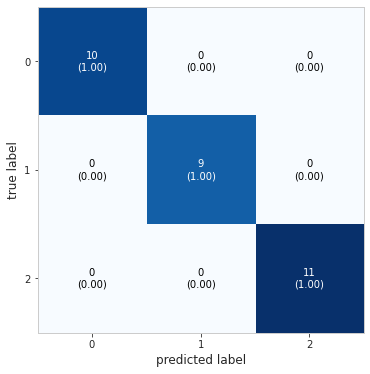

In [17]:
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_normed=True,
                                figsize =(6,6))